# Advanced Python for Data Science
### DS-GA 1019

### Homework Assignment 04
### Due date: 03/01/2023, 4:00PM
### Student's Name: Seonhye Yang
### Student's e-mail: sy3420@nyu.edu

# Problem 1 (100 points)

The task is to optimize your solutions by using "line_profiler". 

Your submission "spring2023_sol04_yourid.ipynb" will contain:
- the first part is your original solution (a solution that you originally wrote); 
- the second part is your final, optimized solution after using line_profiler; 
- both of which will include the line_profiler results, and your detailed comments.


The problem is to simulate a random motion of $n$ objects over a discrete time. 

Concretely, there is:
- a unit square $[0,1]^2$, 
- $n$ points within the unit square, 
- and the time is discrete $t=0, 1, 2, \dots$. 

At time $t=0$, the positions of $n$ points are randomly and uniformly distributed within the unit square; call these positions $\{p_0, p_1, p_2,\dots, p_{n-1}\}$. 

At every time step $t \geq 0$, every point $i$, chooses to randomly move in one of four directions: left, right, up, down. The distance is also random uniform number on $[0, \delta]$, where $\delta$ is given. 

That is, at every time step $t$ and for every $i$ we generate a random move as: 
$$ p_i := p_i + r_i \cdot u_i$$
where 
$$ r_i \sim uniform[0, \delta],$$ 
and 
$u_i$ represents a random direction, i.e. a randomly chosen vector among $(-1, 0), (1, 0), (0, -1), (0, 1)$.

**Dynamics**

Now, one would like to examine and plot the diagram of the minimum distance $d_{\min}$ among these $n$ points over $T$ iterations.

The task is to complete the rest of this notebook, where definitions of the functions main_orignal and main_optimized are given below. 

In [11]:
import numpy as np
import random
from itertools import combinations
import matplotlib.pyplot as plt

In [4]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


---

### The original code description: 

** TO BE POPULATED **

I created a "preprocessing" function because it would run faster when we run the main_origin, and it looks much cleaner. 

I made a function that generates random uniform co-ordinates. 

I also made a function that calculates the distance of co-ordinates and I just used the standard distance equation for this. 

---


In [166]:
#lets create the random uniform points
def loop_points(n):
    list_points = []
    for i in range(n):
        x = (np.random.uniform(0, 1))**2
        y = (np.random.uniform(0, 1))**2
        list_points.append([x, y])
    return list_points

In [167]:
#example that the code runs
s = loop_points(2)
s

[[0.40039934340244054, 0.002342918862476655],
 [0.7112743350807236, 0.4307105440621209]]

In [182]:
def min_distance(d):
    combo = list(combinations(d, 2))
    for i in combo:
        
        '''
        this is just the standard equation for distance. We would usually absolute
        values but we don't need to for this problem since the co-ordinates
        are positive values and squaring it will always make it positive. 
        
        '''
        min_d = np.sqrt((i[0][0] - i[1][0])**2 + (i[0][1] - i[1][1])**2)
    return min_d

In [169]:
min_distance(s)

0.529284500783988

In [184]:
def main_original(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit 
    square 
    delta: a maximal move of a point in one of four random 
    directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points 
    over times: t=0, 1, 2, \dots, T - 1,it is a list of reals of length T
    """
    #r is random uniform number on [0, delta]
    #u is u is random direction
    
    rand_direction = [[-1,0],[1,0],[0,-1],[0,1]]
    points = loop_points(n)
    min_dis_points = []
    min_dis_points.append(min_distance(points))
    
    
#     rand_direction[np.random.choice(4)]
    for i in range(1, T):
        for j in range(n):
            r = np.array(np.random.uniform(0, delta))
            u = rand_direction[np.random.choice(len(rand_direction))]
            random_move = points[j] + r*u
            points[j][0] = np.minimum(np.maximum(random_move[0],0),1) 
            points[j][1] = np.minimum(np.maximum(random_move[1],0),1)
        min_dis_points.append(min_distance(points))
    return min_dis_points

In [185]:
n = 1500
delta = 1.0 / n
T = 20

In [186]:
%lprun -f main_original lst_min_dist = main_original(n, delta, T)

Timer unit: 1e-09 s

Total time: 120.5828 s
File: /var/folders/g5/8420xbfs5csgrv_ygg6vztxw0000gn/T/ipykernel_970/469692841.py
Function: main_original at line 1

Line       Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def main_original(n, delta, T): 
     2                                               """ 
     3                                               n: is the number of uniformly at random generated points in the unit 
     4                                               square 
     5                                               delta: a maximal move of a point in one of four random 
     6                                               directions: left, right, up, or down 
     7                                               T: number of iterations
     8                                               return: 
     9                                               lst_of_min_distances: of the minimum distances among all n points 
    10                                               over times: t=0, 1, 2, \dots, T - 1,it is a list of reals of length T
    11                                               """
    12                                               #r is random uniform number on [0, delta]
    13                                               #u is u is random direction
    14                                               
    15         1       1000.0   1000.0      0.0      rand_direction = [[-1,0],[1,0],[0,-1],[0,1]]
    16         1    9680000.0 9680000.0      0.0      points = loop_points(n)
    17         1       1000.0   1000.0      0.0      min_dis_points = []
    18         1 1969705000.0 1969705000.0      3.5      min_dis_points.append(min_distance(points))
    19                                               
    20                                               
    21                                           #     rand_direction[np.random.choice(4)]
    22        19      27000.0   1421.1      0.0      for i in range(1, T):
    23     28500   12311000.0    432.0      0.0          for j in range(n):
    24     28500  108260000.0   3798.6      0.2              r = np.array(np.random.uniform(0, delta))
    25     28500  430622000.0  15109.5      0.8              u = rand_direction[np.random.choice(4)]
    26     28500  154618000.0   5425.2      0.3              random_move = points[j] + r*u
    27     28500  124595000.0   4371.8      0.2              points[j][0] = np.minimum(np.maximum(random_move[0],0),1) 
    28     28500  108714000.0   3814.5      0.2              points[j][1] = np.minimum(np.maximum(random_move[1],0),1)
    29        19 53664178000.0 2824430421.1     94.8          mindis = min_distance(points)
    30        19      55000.0   2894.7      0.0          min_dis_points.append(mindis)
    31         1       1000.0   1000.0      0.0      return min_dis_points

len: 20


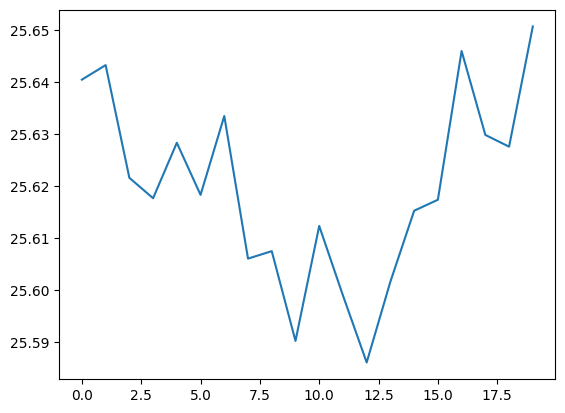

In [132]:
# plot the diagram of the minimum distances:
# where we rescale distance with by factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) * np.sqrt(n))
plt.show()

---

### The optimized code description: 

** TO BE POPULATED **

I got rid off the loop inside because this increased the time complexity. 

What I did instead was create a loop for the u variable (random direction) so it doesn't loop over the entire function. There for it loops over the random direction vector. 


---


In [178]:
def main_optimized(n, delta, T): 
    """ 
    n: is the number of uniformly at random generated points in the unit square 
    delta: a maximal move of a point in one of four random directions: left, right, up, or down 
    T: number of iterations
    return: 
    lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
    it is a list of reals of length T"""
    rand_direction = [[-1,0],[1,0],[0,-1],[0,1]]
    points = loop_points(n)
    min_dis_points = []
    min_dis_points.append(min_distance(points))
    for i in range(1, T):
        r = np.array(np.random.uniform(0, delta))
        u = np.array([rand_direction[i] for i in np.random.choice(4, size=n)])
        random_move = points + r*u
        points = np.maximum(random_move, 0)
        points = np.maximum(random_move, 1)
        min_dis_points.append(min_distance(points))
    return min_dis_points

In [179]:
n = 1500
delta = 1.0 / n
T = 40

In [180]:
%lprun -f main_optimized lst_min_dist = main_optimized(n, delta, T)

Timer unit: 1e-09 s

Total time: 104.457 s
File: /var/folders/g5/8420xbfs5csgrv_ygg6vztxw0000gn/T/ipykernel_970/729643702.py
Function: main_optimized at line 1

Line  Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     1                                           def main_optimized(n, delta, T): 
     2                                               """ 
     3                                               n: is the number of uniformly at random generated points in the unit square 
     4                                               delta: a maximal move of a point in one of four random directions: left, right, up, or down 
     5                                               T: number of iterations
     6                                               return: 
     7                                               lst_of_min_distances: of the minimum distances among all n points over times: t=0, 1, 2, \dots, T - 1,
     8                                               it is a list of reals of length T"""
     9         1       2000.0   2000.0      0.0      rand_direction = [[-1,0],[1,0],[0,-1],[0,1]]
    10         1    9283000.0 9283000.0      0.0      points = loop_points(n)
    11         1       1000.0   1000.0      0.0      min_dis_points = []
    12         1 1826369000.0 1826369000.0      1.7      min_dis_points.append(min_distance(points))
    13                                               
    14                                               
    15                                           #     rand_direction[np.random.choice(4)]
    16        39      40000.0   1025.6      0.0      for i in range(1, T):
    17        39    1075000.0  27564.1      0.0          r = np.array(np.random.uniform(0, delta))
    18        39   47177000.0 1209666.7      0.0          u = np.array([rand_direction[i] for i in np.random.choice(4, size =n)])
    19        39    1492000.0  38256.4      0.0          random_move = points + r*u
    20        39     461000.0  11820.5      0.0          points = np.maximum(random_move, 0)
    21        39     257000.0   6589.7      0.0          points = np.maximum(random_move, 1)
    22        39 102570746000.0 2630019128.2     98.2          mindis = min_distance(points)
    23        39     134000.0   3435.9      0.0          min_dis_points.append(mindis)
    24         1       1000.0   1000.0      0.0      return min_dis_points

len: 40


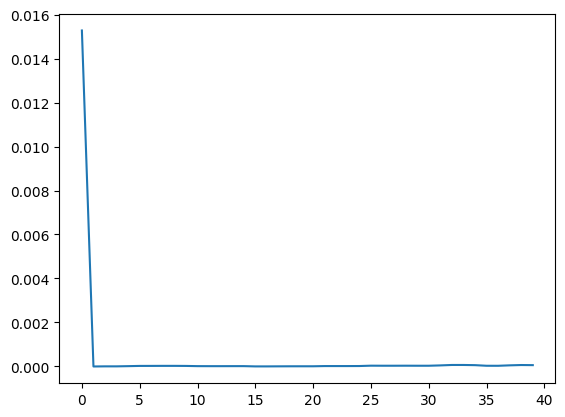

In [183]:
# plot the diagram of the minimum distances:
# where we rescale distance by a factor $\sqrt{n}$:
print("len:", len(lst_min_dist))
plt.plot(range(T), np.array(lst_min_dist) / np.sqrt(n))
plt.show()